In [6]:
import os
import random
import numpy as np
import cv2
from tqdm import tqdm
from matplotlib import pyplot as plt
from IPython import display

In [7]:
DATA_DIR = '/content/drive/MyDrive/Colab/Animals'

In [8]:
# Load image categories
def load_image(DATA_DIR):
    categories = os.listdir(DATA_DIR)
    return categories

In [9]:
# Function to create and preprocess training data
def get_trained_data(categories, data_dir):
    trained_data = []
    for c in categories:
        new_path = os.path.join(data_dir, c)
        for img in tqdm(os.listdir(new_path)):
            label = categories.index(c)
            img_path = os.path.join(new_path, img)
            try:
                img_arr = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                img_arr = cv2.resize(img_arr, (32, 32))
                trained_data.append([img_arr, label])
            except:
                pass
    random.shuffle(trained_data)
    return trained_data

In [14]:
def distance(train, valid):
    return np.abs(train - valid)

In [11]:
def KNN(validation_set, trained_set, k=5):
    predictions = []
    for v in validation_set:
        distances = []
        for t in trained_set:
            z = distance(t[0], v[0])
            d = np.sqrt(np.sum(np.square(z)))  # Euclidean distance
            distances.append([d, t[1]])  # Store distance and label
        distances.sort(key=lambda x: x[0])
        nearest_neighbors = [label for _, label in distances[:k]]
        pred = max(set(nearest_neighbors), key=nearest_neighbors.count)
        predictions.append((pred, v[1]))  # (Predicted label, Actual label)
    return predictions

In [13]:
"""
def split_into_folds(data, num_folds=5):
    fold_size = len(data) // num_folds
    folds = []

    start_index = 0
    for i in range(num_folds):
        if i < num_folds - 1:
            folds.append(data[start_index:start_index + fold_size])
        else:
            folds.append(data[start_index:])  # Last fold gets any extra items
        start_index += fold_size

    return folds
"""


'\ndef split_into_folds(data, num_folds=5):\n    fold_size = len(data) // num_folds\n    folds = []\n\n    start_index = 0\n    for i in range(num_folds):\n        if i < num_folds - 1:\n            folds.append(data[start_index:start_index + fold_size])\n        else:\n            folds.append(data[start_index:])  # Last fold gets any extra items\n        start_index += fold_size\n\n    return folds\n'

In [15]:
def KFOLD(dataset, kf=5, k_nei=range(1, 31)):
    """
    Perform 5-Fold Cross-Validation for k-NN classification.
    Calculate average accuracy across folds and centroid of accuracies.
    """
    fold_size = len(dataset) // kf
    point_dict = {k: [] for k in k_nei}

    for i in range(kf):  # Loop over folds
        validation_set = dataset[i * fold_size:(i + 1) * fold_size]
        training_set = dataset[:i * fold_size] + dataset[(i + 1) * fold_size:]
        print("-" * 20)
        print(f"Fold {i + 1}")
        for k in k_nei:
            predictions = KNN(training_set, validation_set, k)
            correct = sum(1 for pred, actual in predictions if pred == actual)
            accuracy = correct / len(validation_set)
            point_dict[k].append(accuracy)
            print(f"K={k}, Accuracy={accuracy * 100:.2f}%")
        print("-" * 20)
    avg_accuracies = {k: np.mean(point_dict[k]) for k in k_nei}
    centroids = {k: np.mean(point_dict[k]) for k in k_nei}
    return avg_accuracies, centroids

In [16]:

def show_image(img_matrix, title):
    """
    Display an image matrix with a title.
    """
    plt.figure()
    plt.title(title)
    plt.imshow(img_matrix)
    plt.show()

In [17]:
def plot_accuracy_vs_k(points, std_devs):
    K_values = list(points.keys())
    accuracies = list(points.values())
    errors = list(std_devs.values())

    plt.figure(figsize=(10, 6))
    plt.plot(K_values, accuracies, marker='o', linestyle='-', color='g', label="Centroid Trend Line")
    plt.errorbar(K_values, accuracies, yerr=errors, fmt='o', ecolor='gray', capsize=3, label="Error Bars")
    plt.title('Cross Validation on k', fontsize=14)
    plt.xlabel("Values of Hyper Parameter (k in KNN)", fontsize=12)
    plt.ylabel("Cross-Validation Accuracy", fontsize=12)
    plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.6)
    plt.tight_layout()
    plt.legend()
    plt.show()

In [18]:
categories = load_image(DATA_DIR)
trained_data = get_trained_data(categories, DATA_DIR)

100%|██████████| 39/39 [00:08<00:00,  4.40it/s]


In [19]:
random.shuffle(trained_data)

In [20]:
K_nei = range(1, 31)
points = {}
for k in K_nei:
    print("-" * 10, f"For Neighbour = {k}", "-" * 10)
    avg_accuracies, centroids = KFOLD(trained_data, kf=5, k_nei=[k])
    points[k] = {
        'avg_accuracy': avg_accuracies[k],
        'accuracies': centroids[k]
    }
    print(f"Average Accuracy for k={k}: {avg_accuracies[k] * 100:.2f}%")
    print(f"Centroid for k={k}: {centroids[k] * 100:.2f}%")
    print("-" * 7)

---------- For Neighbour = 1 ----------
--------------------
Fold 1
K=1, Accuracy=70.59%
--------------------
--------------------
Fold 2
K=1, Accuracy=100.00%
--------------------
--------------------
Fold 3
K=1, Accuracy=88.24%
--------------------
--------------------
Fold 4
K=1, Accuracy=70.59%
--------------------
--------------------
Fold 5
K=1, Accuracy=114.71%
--------------------
Average Accuracy for k=1: 88.82%
Centroid for k=1: 88.82%
-------
---------- For Neighbour = 2 ----------
--------------------
Fold 1
K=2, Accuracy=67.65%
--------------------
--------------------
Fold 2
K=2, Accuracy=105.88%
--------------------
--------------------
Fold 3
K=2, Accuracy=70.59%
--------------------
--------------------
Fold 4
K=2, Accuracy=82.35%
--------------------
--------------------
Fold 5
K=2, Accuracy=94.12%
--------------------
Average Accuracy for k=2: 84.12%
Centroid for k=2: 84.12%
-------
---------- For Neighbour = 3 ----------
--------------------
Fold 1
K=3, Accuracy=64.

In [21]:
avg_accuracies, std_devs = KFOLD(trained_data, kf=5, k_nei=K_nei)

--------------------
Fold 1
K=1, Accuracy=70.59%
K=2, Accuracy=67.65%
K=3, Accuracy=64.71%
K=4, Accuracy=73.53%
K=5, Accuracy=58.82%
K=6, Accuracy=67.65%
K=7, Accuracy=67.65%
K=8, Accuracy=61.76%
K=9, Accuracy=58.82%
K=10, Accuracy=55.88%
K=11, Accuracy=55.88%
K=12, Accuracy=67.65%
K=13, Accuracy=73.53%
K=14, Accuracy=70.59%
K=15, Accuracy=73.53%
K=16, Accuracy=73.53%
K=17, Accuracy=79.41%
K=18, Accuracy=76.47%
K=19, Accuracy=73.53%
K=20, Accuracy=73.53%
K=21, Accuracy=73.53%
K=22, Accuracy=73.53%
K=23, Accuracy=73.53%
K=24, Accuracy=73.53%
K=25, Accuracy=73.53%
K=26, Accuracy=73.53%
K=27, Accuracy=73.53%
K=28, Accuracy=73.53%
K=29, Accuracy=73.53%
K=30, Accuracy=73.53%
--------------------
--------------------
Fold 2
K=1, Accuracy=100.00%
K=2, Accuracy=105.88%
K=3, Accuracy=102.94%
K=4, Accuracy=97.06%
K=5, Accuracy=91.18%
K=6, Accuracy=91.18%
K=7, Accuracy=100.00%
K=8, Accuracy=82.35%
K=9, Accuracy=85.29%
K=10, Accuracy=85.29%
K=11, Accuracy=85.29%
K=12, Accuracy=79.41%
K=13, Accurac

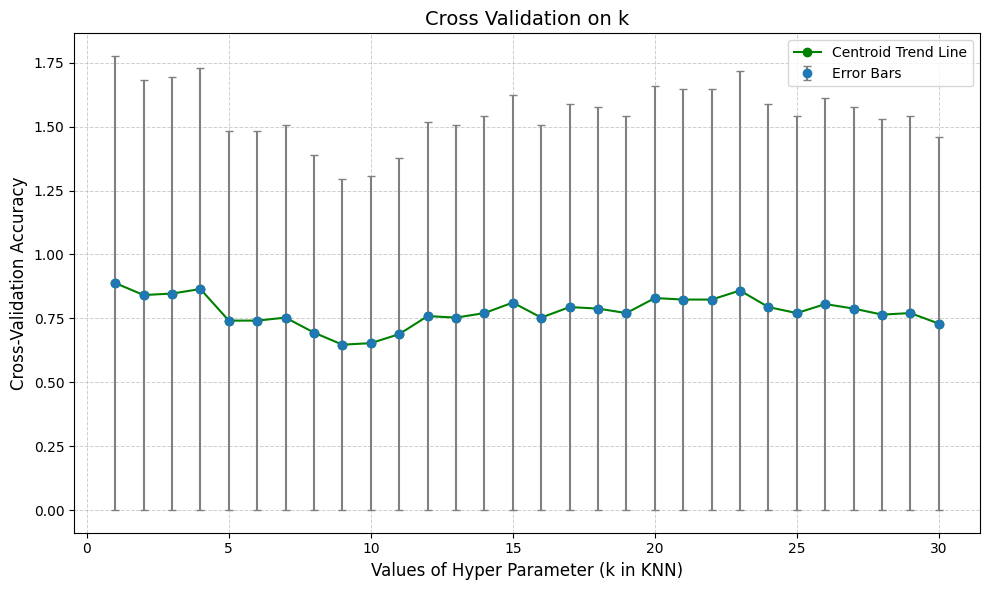

In [22]:
plot_accuracy_vs_k(avg_accuracies, std_devs)